In [2]:
import numpy as np
import math
import random
import statistics
import matplotlib.pyplot as plt
from scipy.stats import norm
import sympy as sy
import scipy.stats as si
import seaborn as sns
from numba import jit

## Part 1: Basic Option Valuation

In [66]:
#calculate BS option price
def BSmodel(S=100,K=99,T=1,r=0.06,sigma=0.2,option_type="put"):
    d1=(np.log(S/K)+(r + 0.5 * sigma ** 2) * T)/(sigma*np.sqrt(T))
    d2=d1-sigma*np.sqrt(T)
    if option_type=="call":
        option_price=S*norm.cdf(d1)-K*np.exp(-r*T)*norm.cdf(d2)
    elif option_type=="put":
        option_price=K*np.exp(-r*T)*norm.cdf(-d2)-S*norm.cdf(-d1)
    return option_price

#calculate std of MC option price
def montecarlopayoff(S0=100,K=99,T=1,r=0.06,sigma=0.2,M=20000,option_style="put"):
    z=np.random.standard_normal(M)
    ST=S0*np.exp((r-0.5*sigma**2)*T+sigma*np.sqrt(T)*z)
    if option_style=="call":
        payoff=np.maximum(ST-K,0)*np.exp(-r*T)
        stdpayoff=np.std(payoff)/np.sqrt(M)
    elif option_style=="put":
        payoff=np.maximum(K-ST,0)*np.exp(-r*T)
        stdpayoff=np.std(payoff)/np.sqrt(M)
    return  stdpayoff

#calculate monte-carlo option price
def montecarloprice(S0=100,K=99,T=1,r=0.06,sigma=0.2,M=20000,option_style="put"):
    z=np.random.standard_normal(M)
    ST=S0*np.exp((r-0.5*sigma**2)*T+sigma*np.sqrt(T)*z)
    if option_style=="call":
        payoff=np.maximum(ST-K,0)
        option_price=np.exp(-r*T)*np.sum(payoff)/M
    elif option_style=="put":
        payoff=np.maximum(K-ST,0)
        option_price=np.exp(-r*T)*np.sum(payoff)/M
    return  option_price
print (montecarloprice(S0=100,K=99,T=1,r=0.06,sigma=0.2,M=20000,option_style="put"))
print (BSmodel(S=100,K=99,T=1,r=0.06,sigma=0.2,option_type="put"))
plist=[]
for h in range(30):
    price=montecarloprice(M=20000)
    plist.append(price)
print (np.mean(plist))

4.791403048623195
4.778969051891707
4.778312603892628


In [71]:
Ml=np.arange(100,20000,100)
MC_option_price=[montecarloprice(M=i) for i in Ml]
standard_error=[montecarlopayoff(M=i) for i in Ml]
plist=[]
for i in Ml:
    price=[montecarloprice(M=i) for h in range(30)]
    plist.append(price)
montecarlopayoff(M=20000)

0.05656226191518364

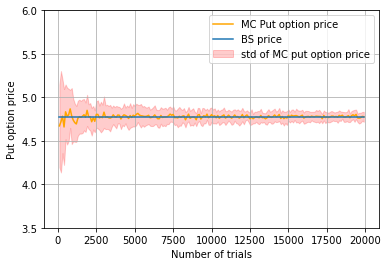

In [72]:
#Part 1-question 1:Comparison of Monte Carlo Put option price with BS Put option price
BS_price=np.ones(len(Ml))*BSmodel(S=100,K=99,T=1,r=0.06,sigma=0.2,option_type="put")
plt.plot(Ml,[np.mean(plist[i])for i in range(len(plist))],color='orange',label='MC Put option price')
plt.fill_between(Ml,y1=np.array([np.mean(plist[i])for i in range(len(plist))])+np.array([np.std(plist[i])for i in range(len(plist))]),y2=np.array([np.mean(plist[i])for i in range(len(plist))])-np.array([np.std(plist[i])for i in range(len(plist))]),color='red',label='std of MC put option price',alpha=0.2)
plt.plot(Ml,BS_price,label='BS price')
plt.xlabel('Number of trials')
plt.ylabel('Put option price')
plt.legend()
plt.grid()
plt.ylim(3.5,6)
#plt.savefig("Comparison of Monte Carlo Put option price with BS Put option price with 30 simulations",dpi=400)
plt.show()

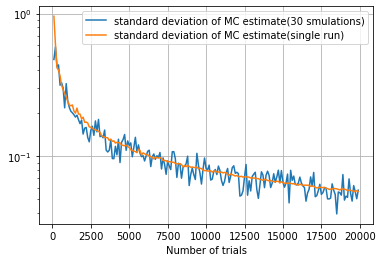

In [73]:
plt.plot(Ml,np.array([np.std(plist[i])for i in range(len(plist))]),label='standard deviation of MC estimate(30 smulations)')
plt.plot(Ml,standard_error,label='standard deviation of MC estimate(single run)')
plt.xlabel('Number of trials')
plt.yscale('log')
plt.legend()
plt.grid()
#plt.savefig("standard error of MC estimate",dpi=400)
plt.show()

In [8]:
#Part 1-question 2: numerical tests for varying strike price
strikeprice=np.arange(80,110,1)
strikemean=[]
strikestd=[]
for i in strikeprice:
    k=[montecarloprice(K=i) for h in range(30)]
    strikemean.append(np.mean(k))
    strikestd.append(np.std(k))   

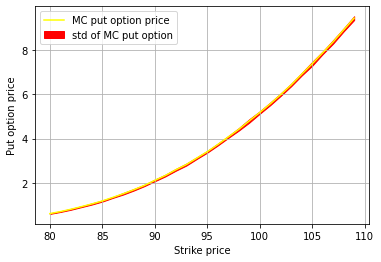

In [9]:
plt.plot(strikeprice,strikemean,label='MC put option price',color='yellow')
plt.fill_between(strikeprice,y1=strikemean-np.array(strikestd),y2=strikemean+np.array(strikestd),color='red',label='std of MC put option')
plt.xlabel('Strike price')
plt.ylabel('Put option price')
plt.legend()
plt.grid()
plt.show()

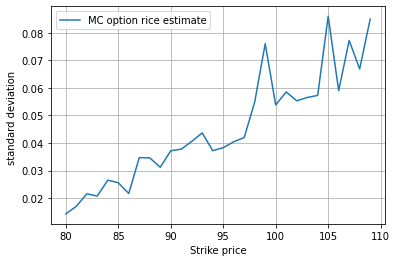

In [68]:
standard_error=[montecarlopayoff(K=i) for i in strikeprice]
plt.plot(strikeprice,np.array(strikestd),label='MC option rice estimate')
plt.xlabel('Strike price')
plt.ylabel('standard deviation ')
plt.legend()
plt.grid()
#plt.savefig("standard error of MC estimate with different strike price",dpi=400)
plt.show()

In [11]:
#Part1-question 2: numerical tests for varying volatility
volatility=np.arange(0.1,1.1,0.1)
Ml=np.arange(100,20000,100)
volatilitymean=[]
volatilitystd=[]
for i in volatility:
    k=[montecarloprice(sigma=i) for h in range(30)]
    volatilitymean.append(np.mean(k))
    volatilitystd.append(np.std(k))

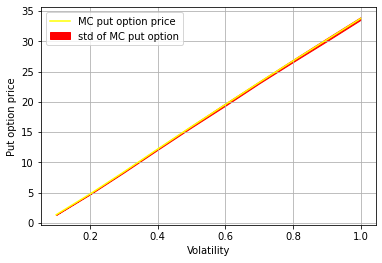

In [12]:
plt.plot(volatility,volatilitymean,label='MC put option price',color='yellow')
plt.fill_between(volatility,y1=volatilitymean+np.array(volatilitystd),y2=volatilitymean-np.array(volatilitystd),color='red',label='std of MC put option')
plt.xlabel('Volatility')
plt.ylabel('Put option price')
plt.legend()
plt.grid()

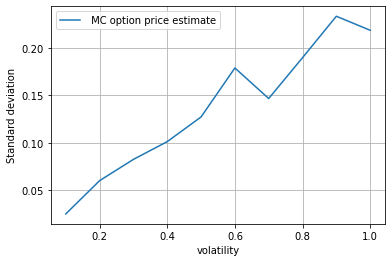

In [69]:
standard_error=[montecarlopayoff(sigma=i) for i in volatility]
plt.plot(volatility,np.array(volatilitystd),label=' MC option price estimate')
plt.xlabel('volatility')
plt.ylabel('Standard deviation')
plt.legend()
plt.grid()
#plt.savefig("standard error of MC estimate with different volatility",dpi=400)
plt.show()

## Part 2: Estimation of Sensitivities in MC

In [14]:
def Monte_Carlo(K,r,S0,vol,T,M,seed=None):
    if seed is not None: # preparing for the seed
        np.random.seed(seed)
    # calculate the stock price at Maturity M times
    S_T = S0*np.exp((r-0.5*(vol**2))*T+vol*np.sqrt(T)*np.random.normal(size=M))

    # European put option payoff
    pay_off = [max(K-i,0) for i in S_T]
    
    # calculate the option price
    V= np.exp(-r*T)*np.mean(pay_off)

    return V

In [15]:
def BS_put(K,r,S0,vol,T,t=0): # European put option of Black-Scholes model
    d1=(np.log(S0/K)+(r+vol**2/2)*(T-t))/(vol*np.sqrt(T-t))
    d2=d1-vol*np.sqrt(T-t)

    P_t=np.exp(-r*(T-t))*K*si.norm.cdf(-d2)-S0*si.norm.cdf(-d1)

    hedge = -si.norm.cdf(-d1)
    
    return P_t,hedge

In [16]:
put_option=BS_put(99,0.06,100,0.2,1,t=0)[0]
print(put_option)
put_hedge=BS_put(99,0.06,100,0.2,1,t=0)[1]
print(put_hedge)

4.778969051891707
-0.3262644882651039


In [19]:
# investigate the bump size epsilon: same seed method
elist=[0.01,0.02,0.5]
M_list=[10000,100000,1000000,10000000]
same_seed_list=[]
for k in elist:
    same_seed_eu=[]
    for i in M_list:
        unbumped_V = np.array([Monte_Carlo(99,0.06,100,0.2,1,i,seed=j) for j in range(30)])
        bumped_V = np.array([Monte_Carlo(99,0.06,100+k,0.2,1,i,seed=j) for j in range(30)])
        delta = (bumped_V-unbumped_V)/k
        same_seed_eu.append(np.mean(delta))
    same_seed_list.append(same_seed_eu)

In [20]:
same_relative_error=abs((np.array(same_seed_list)-put_hedge)/put_hedge)
print(same_relative_error)

[[0.00184799 0.00027798 0.00037203 0.00027321]
 [0.00154014 0.00054638 0.00064737 0.00054955]
 [0.01191166 0.01372999 0.01388616 0.01373379]]


In [21]:
# investigate the bump size epsilon: different seed method
elist=[0.01,0.02,0.5]
M_list=[10000,100000,1000000,10000000]
diff_seed_list=[]
for k in elist:
    diff_seed_eu=[]
    for i in M_list:
        unbumped_V = np.array([Monte_Carlo(99,0.06,100,0.2,1,i,seed=None) for j in range(30)])
        bumped_V = np.array([Monte_Carlo(99,0.06,100+k,0.2,1,i,seed=None) for j in range(30)])
        delta = (bumped_V-unbumped_V)/k
        diff_seed_eu.append(np.mean(delta))
    diff_seed_list.append(diff_seed_eu)

In [22]:
diff_relative_error=abs((np.array(diff_seed_list)-put_hedge)/put_hedge)
print(diff_relative_error)

[[4.58167820e+00 3.41262522e+00 1.22322524e+00 4.18835116e-02]
 [7.97591204e-01 7.92453650e-01 1.14465024e-01 9.68759914e-02]
 [1.32870458e-01 3.60149987e-03 1.28399732e-02 6.23817733e-03]]


In [23]:
#Part2-question 1: use the bump and revalue method calculate the delta of European put option

# different seed method
Mlist=np.arange(100,20000,100) # number for trials
epsilon = 0.5
different_seed=[]
diff_std_list=[]
for i in Mlist:
    delta_list=[]
    for j in range(30): # MC simulation 30 times for bumped and unbumped estimate of the value respectively
        unbumped_V = Monte_Carlo(99,0.06,100,0.2,1,i,seed=None)   
        bumped_V =  Monte_Carlo(99,0.06,100+epsilon,0.2,1,i,seed=None)
        delta = (bumped_V-unbumped_V)/epsilon
        delta_list.append(delta)
    different_seed.append(np.mean(delta_list))
    diff_std_list.append(np.std(delta_list,ddof=1)) 

In [24]:
# same seed method
same_seed=[]
same_std_list=[]
for i in Mlist:
    delta_list=[]
    for j in range(30): # MC simulation 30 times for bumped and unbumped estimate of the value respectively
        unbumped_V = Monte_Carlo(99,0.06,100,0.2,1,i,seed=j)   
        bumped_V =  Monte_Carlo(99,0.06,100+epsilon,0.2,1,i,seed=j)
        delta = (bumped_V-unbumped_V)/epsilon
        delta_list.append(delta)
    same_seed.append(np.mean(delta_list))
    same_std_list.append(np.std(delta_list,ddof=1))

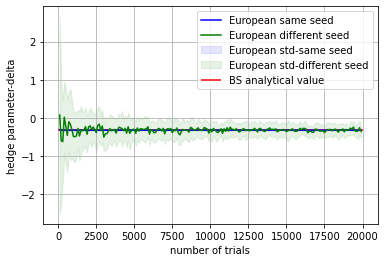

In [25]:
plt.plot(Mlist,same_seed,color="blue",label="European same seed")
plt.fill_between(Mlist,np.array(same_seed)+np.array(same_std_list),np.array(same_seed)-np.array(same_std_list),color="blue",alpha=0.1,label="European std-same seed")
plt.plot(Mlist,different_seed,color="green",label="European different seed")
plt.fill_between(Mlist,np.array(different_seed)+np.array(diff_std_list),np.array(different_seed)-np.array(diff_std_list),color="green",alpha=0.1,label="European std-different seed")
plt.hlines(put_hedge,0,20000,color="red",label="BS analytical value")
plt.xlabel("number of trials")
plt.ylabel("hedge parameter-delta")
plt.grid()
plt.legend(loc="best")
#plt.savefig("European delta",dpi=400)
plt.show()

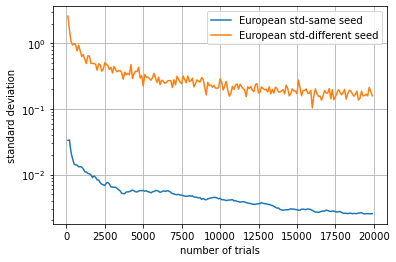

In [26]:
plt.semilogy(Mlist,same_std_list,label="European std-same seed")
plt.semilogy(Mlist,diff_std_list,label="European std-different seed")
plt.xlabel("number of trials")
plt.ylabel("standard deviation")
plt.grid()
plt.legend(loc="best")
#plt.savefig("European std",dpi=400)
plt.show()

In [27]:
def digital(S_T, K):
    if S_T>=K:
        pay_off=1
    else:
        pay_off=0
    return pay_off
    
def logistic(x):
    return 1/(1+np.exp(-x))

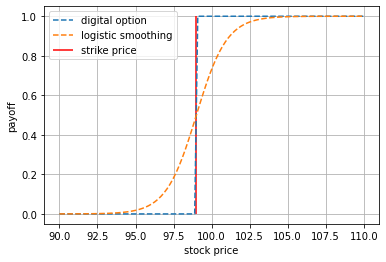

In [28]:
# using logistic function to smmoth the payoff of digital call option
Slist=np.linspace(90,110,100)
payoff_list=[]
log_list=[]
for i in Slist:
    payoff= digital(i,K=99)
    log = logistic(i-99)
    payoff_list.append(payoff)
    log_list.append(log)
plt.plot(Slist,payoff_list,"--",label="digital option")
plt.plot(Slist,log_list,"--",label="logistic smoothing")
plt.vlines(99,0,1,color="red",label="strike price")
plt.xlabel("stock price")
plt.ylabel("payoff")
plt.grid()
plt.legend(loc="best")
#plt.savefig("logistic",dpi=400)
plt.show()

In [29]:
def Monte_Carlo_digital(K,r,S0,vol,T,M,seed=None):
    if seed is not None: # preparing for the seed
        np.random.seed(seed)
    # calculate the stock price at Maturity M times
    S_T = S0*np.exp((r-0.5*(vol**2))*T+vol*np.sqrt(T)*np.random.normal(size=M))

    # digital option payoff: pays 1 euro if the stock price at expiry is higher than strike and otherwise 0
    pay_off=[]
    for i in S_T:
        if i>K:
            pay_off.append(1)
        else:
            pay_off.append(0)
    # print(pay_off)
    V = np.exp(-r*T)*np.mean(pay_off)


    return V

In [30]:
# Part2-question2: use the bump and revalue method calculate the delta of digital call option

# different seed method
epsilon = 0.5
different_seed_digi=[]
digi_diff_std_list=[]
for i in Mlist:
    delta_list=[]
    for j in range(30): # MC simulation 30 times for bumped and unbumped estimate of the value respectively
        unbumped_V = Monte_Carlo_digital(99,0.06,100,0.2,1,i,seed=None)   
        bumped_V =  Monte_Carlo_digital(99,0.06,100+epsilon,0.2,1,i,seed=None)
        delta = (bumped_V-unbumped_V)/epsilon
        delta_list.append(delta)
    different_seed_digi.append(np.mean(delta_list))
    digi_diff_std_list.append(np.std(delta_list,ddof=1))

In [31]:
# same seed method
same_seed_digi=[]
digi_same_std_list=[]
for i in Mlist:
    delta_list=[]
    for j in range(30): # MC simulation 30 times for bumped and unbumped estimate of the value respectively
        unbumped_V = Monte_Carlo_digital(99,0.06,100,0.2,1,i,seed=j)   
        bumped_V =  Monte_Carlo_digital(99,0.06,100+epsilon,0.2,1,i,seed=j)
        delta = (bumped_V-unbumped_V)/epsilon
        delta_list.append(delta)
    same_seed_digi.append(np.mean(delta_list))
    digi_same_std_list.append(np.std(delta_list,ddof=1))

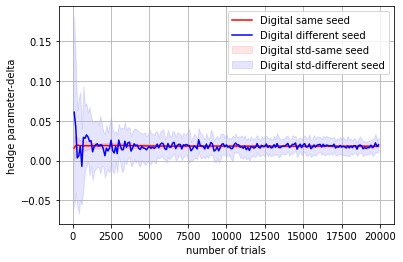

In [32]:
plt.plot(Mlist,same_seed_digi,color="red",label="Digital same seed")
plt.fill_between(Mlist,np.array(same_seed_digi)+np.array(digi_same_std_list),np.array(same_seed_digi)-np.array(digi_same_std_list),color="red",alpha=0.1,label="Digital std-same seed")
plt.plot(Mlist,different_seed_digi,color="blue",label="Digital different seed")
plt.fill_between(Mlist,np.array(different_seed_digi)+np.array(digi_diff_std_list),np.array(different_seed_digi)-np.array(digi_diff_std_list),color="blue",alpha=0.1,label="Digital std-different seed")
plt.xlabel("number of trials")
plt.ylabel("hedge parameter-delta")
plt.grid()
plt.legend(loc="best")
#plt.savefig("Digital delta 1",dpi=400)
plt.show()

In [33]:
def digital_hedge_pathwise(K,r,S0,vol,T,M):

    sample = np.random.normal(size=M)
    # calculate the stock price at Maturity M times
    S_T = S0*np.exp((r-0.5*(vol**2))*T+vol*np.sqrt(T)*sample)

    # digital option payoff: using logistic smoothing
    pay_off=[np.exp(i-K)/((1+np.exp(i-K))**2) for i in S_T]

    # calculate hedge parameter with pathwise method
    hedge_list=[np.exp(-r*T)*pay_off[i]*S_T[i]/S0 for i in range(M)]
    #print(hedge_list)

    delta = np.mean(hedge_list)

    return delta

In [34]:
def digital_hedge_likelihood(K,r,S0,vol,T,M):

    sample = np.random.normal(size=M)
    # calculate the stock price at Maturity M times
    S_T = S0*np.exp((r-0.5*(vol**2))*T+vol*np.sqrt(T)*sample)

    # digital option payoff: pays 1 euro if the stock price at expiry is higher than strike and otherwise 0
    pay_off=[]
    for i in S_T:
        if i>=K:
            pay_off.append(1)
        else:
            pay_off.append(0)

    # calculate hedge parameter with likelihood method
    hedge_list=[np.exp(-r*T)*pay_off[i]*sample[i]/(S0*vol*np.sqrt(T)) for i in range(M)]
    #print(hedge_list)

    delta = np.mean(hedge_list)

    return delta

In [35]:
# Part2-question2: use the pathwise method to calculate the delta of digital call option

# pathwise method
pathwise_list=[]
pathwise_std_list=[]
for i in Mlist:
    delta_list=[]
    for j in range(30): # simulation 30 times
        hedge = digital_hedge_pathwise(99,0.06,100,0.2,1,i)
        delta_list.append(hedge)
    pathwise_list.append(np.mean(delta_list))
    pathwise_std_list.append(np.std(delta_list,ddof=1))

In [36]:
# Part2-question2: use the likelihood ratio method to calculate the delta of digital call option

# likelihood ratio method
likeli_list=[]
likeli_std_list=[]
for i in Mlist:
    delta_list=[]
    for j in range(30): # simulation 30 times
        hedge = digital_hedge_likelihood(99,0.06,100,0.2,1,i)
        delta_list.append(hedge)
    likeli_list.append(np.mean(delta_list))
    likeli_std_list.append(np.std(delta_list,ddof=1))

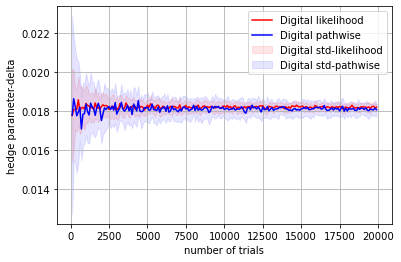

In [37]:
plt.plot(Mlist,likeli_list,color="red",label="Digital likelihood")
plt.fill_between(Mlist,np.array(likeli_list)+np.array(likeli_std_list),np.array(likeli_list)-np.array(likeli_std_list),color="red",alpha=0.1,label="Digital std-likelihood")
plt.plot(Mlist,pathwise_list,color="blue",label="Digital pathwise")
plt.fill_between(Mlist,np.array(pathwise_list)+np.array(pathwise_std_list),np.array(pathwise_list)-np.array(pathwise_std_list),color="blue",alpha=0.1,label="Digital std-pathwise")
plt.xlabel("number of trials")
plt.ylabel("hedge parameter-delta")
plt.grid()
plt.legend(loc="best")
#plt.savefig("Digital delta 2",dpi=400)
plt.show()

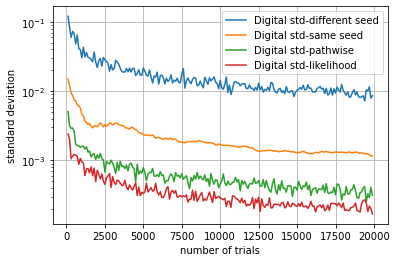

In [38]:
plt.semilogy(Mlist,digi_diff_std_list,label="Digital std-different seed")
plt.semilogy(Mlist,digi_same_std_list,label="Digital std-same seed")
plt.semilogy(Mlist,pathwise_std_list,label="Digital std-pathwise")
plt.semilogy(Mlist,likeli_std_list,label="Digital std-likelihood")
plt.xlabel("number of trials")
plt.ylabel("standard deviation")
plt.grid()
plt.legend(loc="best")
#plt.savefig("Digital std",dpi=400)
plt.show()

## Part 3 Variance reduction

In [43]:
#return the discounted payoff for both geometric and arithemtic average for asian call option
@jit
def asian_payoff(time_points,S,r,sigma,T,K,option_type):
    dt=T/time_points
    stock_price=np.zeros(time_points+1)
    stock_price[0]=S
    multi=1*stock_price[0]
    sum_payoff=0+stock_price[0]
    for m in range(1,time_points+1):
        z=np.random.normal(0,1)
        stock_price[m]=stock_price[m-1]*np.exp((r-0.5*pow(sigma,2))*dt+sigma*z*np.sqrt(dt))
        multi=multi*stock_price[m]
        sum_payoff=sum_payoff+stock_price[m]
    if option_type=="call":
        geo_payoff=max(pow(multi,1/(time_points+1))-K,0)*np.exp(-r*T)
        ari_payoff=max(sum_payoff/(time_points+1)-K,0)*np.exp(-r*T)
    if option_type=="put":
        geo_payoff=max(K-pow(multi,1/(time_points+1)),0)*np.exp(-r*T)
        ari_payoff=max(K-sum_payoff/(time_points+1),0)*np.exp(-r*T)
    return geo_payoff,ari_payoff

N=50 # number of times we observe the stock price in the Asian option
T=1
K=99
S0=100
r=0.06
sigma=0.2

print(asian_payoff(N,S0,r,sigma,T,K,"call"))
print(asian_payoff(N,S0,r,sigma,T,K,"put"))

(0.0, 0.0)
(0.0, 0.0)


In [45]:
#calculate the analytical price of geometric average
def geoanalytical_price(n_timepoints,S,r,sigma,T,K,option_type):
    new_sigma=sigma*pow((2*n_timepoints+1)/(6*(n_timepoints+1)),0.5)
    new_r=(r-0.5*np.square(sigma)+np.square(new_sigma))/2
    d1=(np.log(S0/K)+(new_r+np.square(new_sigma)/2)*T)/(new_sigma*np.sqrt(T))
    d2=(np.log(S0/K)+(new_r-np.square(new_sigma)/2)*T)/(new_sigma*np.sqrt(T))
    if option_type=="call":
        option_price=(S0*norm.cdf(d1)*np.exp(new_r*T)-K*norm.cdf(d2))*np.exp(-r*T)
    elif option_type=="put":
        option_price=(K*norm.cdf(-d2)-S0*norm.cdf(-d1)*np.exp(new_r*T))*np.exp(-r*T)
    return option_price

N=50 # number of times we observe the stock price in the Asian option
T=1
K=99
S0=100
r=0.06
sigma=0.2

print(geoanalytical_price(N,S0,r,sigma,T,K,"put"))
print(geoanalytical_price(N,S0,r,sigma,T,K,"call"))

2.830148111329582
6.310747867416329


In [47]:
#calculate the geometric and average price
def asian_price(trials,time_points,S,r,sigma,T,K,option_type):
    geo_payoff=np.zeros(trials)
    ari_payoff=np.zeros(trials)
    for i in range(trials):
        geo_payoff[i],ari_payoff[i]=asian_payoff(time_points,S,r,sigma,T,K,option_type)
    geo_price=np.mean(geo_payoff)
    geo_std=np.std(geo_payoff,ddof=1)/np.sqrt(trials)
    ari_price=np.mean(ari_payoff)
    ari_std=np.std(ari_payoff,ddof=1)/np.sqrt(trials)
    return geo_price,ari_price,geo_std,ari_std

N=50 # number of times we observe the stock price in the Asian option
T=1
K=99
S0=100
r=0.06
sigma=0.2
trial=1000
asian_price(trial,N,S0,r,sigma,T,K,"call")

(6.321388889548667,
 6.566338879744684,
 0.25943200338460165,
 0.26959881600593893)

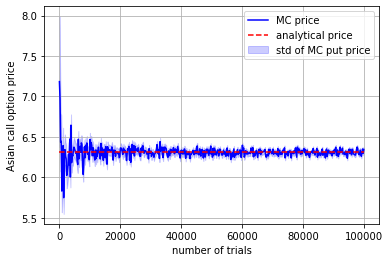

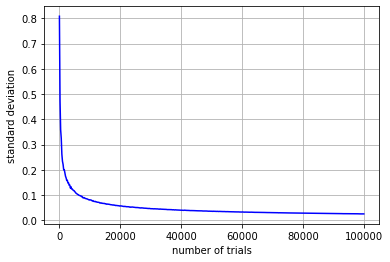

In [49]:
#Part3-Question1: compare the analytical value with those obtained by using MC simulations
N=50 # number of times we observe the stock price in the Asian option
T=1
K=99
S0=100
r=0.06
sigma=0.2
option_type="call"

trials=np.arange(100,100000,200)
geo_ana=geoanalytical_price(N,S0,r,sigma,T,K,option_type)*np.ones(len(trials))

geomc=np.zeros(len(trials))
geomc_std=np.zeros(len(trials))
for i in range(len(trials)):
    allinfo=asian_price(trials[i],N,S0,r,sigma,T,K,option_type)
    geomc[i]=allinfo[0]
    geomc_std[i]=allinfo[2]

plt.plot(trials,geomc,"-",color="blue",label="MC price")
plt.fill_between(trials,geomc-geomc_std,geomc+geomc_std,color="blue", alpha=0.2,label="std of MC put price")
plt.plot(trials,geo_ana,"--",color="red",label="analytical price")
plt.grid()
plt.legend()
plt.xlabel("number of trials")
plt.ylabel("Asian call option price")
plt.savefig("part3_1_price", dpi=400)
plt.show()


plt.plot(trials,geomc_std,"-",color="blue")
plt.grid()
plt.xlabel("number of trials")
plt.ylabel("standard deviation")
plt.savefig("part3_1_std", dpi=400)
plt.show()

In [51]:
#Question 3 Apply control variate technique
def calbeta(sample_size,trials,time_points,S,r,sigma,T,K,option_type):
    geo_price=np.zeros(sample_size)
    ari_price=np.zeros(sample_size)
    for i in range(sample_size):
        geo_price[i],ari_price[i]=asian_price(trials,time_points,S,r,sigma,T,K,option_type)[0:2]
    cov=np.cov(ari_price,geo_price)
    beta=cov[0,1]/np.var(geo_price,ddof=1)
    return beta

sample_size=100
trial=1000
N=50
T=1
K=99
S0=100
r=0.06
sigma=0.2
option_type="call"
calbeta(sample_size,trial,N,S0,r,sigma,T,K,option_type)

1.0387475673336586

[1.03878524 1.03768285 1.03462231 1.03564914 1.0350694  1.03615609
 1.03524691 1.035128   1.03523329 1.03533246 1.03532947 1.03506863
 1.03587303 1.03510001 1.03567784 1.03613217 1.0359429  1.03551411
 1.035754   1.03543166]


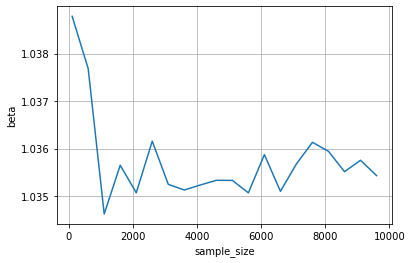

In [53]:
#plot the value of beta
sample_size=np.arange(100,10000,500)
trials=1000
points=50
T=1
K=99
S0=100
r=0.06
sigma=0.2
option_type="call"
beta=np.zeros(len(sample_size))
for i in range(len(sample_size)):
    beta[i]=calbeta(sample_size[i],trials,points,S0,r,sigma,T,K,option_type)
print(beta)
plt.plot(sample_size, beta)
plt.xlabel("sample_size")
plt.ylabel("beta")
plt.grid()
plt.savefig("part3_3_beta1", dpi=400)
plt.show()

## study the performance of the control variate for different parameter settings

In [55]:
# apply the control variate method
def control_asianoption(repeat,trials,time_points,S,r,sigma,T,K,beta,geo_analytical,option_type):
    ari_price=np.zeros(repeat)
    geo_price=np.zeros(repeat)
    control_variate=np.zeros(repeat)
    for i in range(repeat):
        geo_price[i],ari_price[i]=asian_price(trials,time_points,S,r,sigma,T,K,option_type)[0:2]
        control_variate[i]=ari_price[i]-beta*(geo_price[i]-geo_analytical)
    before_mean=np.mean(ari_price)
    before_se=np.std(ari_price,ddof=1)/np.sqrt(repeat)
    after_mean=np.mean(control_variate)
    after_se=np.std(control_variate,ddof=1)/np.sqrt(repeat)
    return before_mean,before_se,after_mean,after_se

beta=1.035
repeat=30
trials=100
N=50
S0=100
K=99
T=1
sigma=0.2
r=0.06
option_type="call"
geo_analytical=geoanalytical_price(N,S0,r,sigma,T,K,option_type)
print(geo_analytical)
control_asianoption(repeat,trials,N,S0,r,sigma,T,K,beta,geo_analytical,option_type)

6.310747867416329


(6.80281491993793, 0.14662995625429062, 6.55298461284844, 0.003942958954800012)

[0.16472161 0.12829017 0.09504275 0.07647494 0.06402237 0.06326137
 0.05974972 0.04205701 0.0457309  0.05906965 0.04647407 0.05147257
 0.03849168 0.03502675 0.03404623 0.03367704 0.03413738 0.02945402
 0.03598201 0.0314343  0.03476082 0.0371193  0.03609528 0.02634906
 0.02787654 0.02721521 0.03173284 0.0277487  0.02565699 0.03015003
 0.03043828 0.03238841 0.02295306 0.02338319 0.02449855 0.02136483
 0.03176758 0.02819395 0.02540811 0.02341154 0.01948588 0.02514452
 0.02079156 0.0258283  0.02291909 0.02744866 0.02734303 0.02385609
 0.02079182 0.02403459 0.0214482  0.02245875 0.02114148 0.02579942
 0.01843852 0.02118101 0.02153541 0.02016703 0.01796109 0.01745578
 0.01731557 0.02403073 0.01770607 0.01639924 0.02281745 0.01580343
 0.01947775 0.01614347 0.01935269 0.02232186 0.01908098 0.0175921
 0.02171319 0.0166014  0.01587883 0.01364926 0.01684174 0.0210889
 0.01966584 0.01538451 0.01775674 0.02002792 0.01563589 0.01820278
 0.01507668 0.01730827 0.01403957 0.01605749 0.023524   0.018767

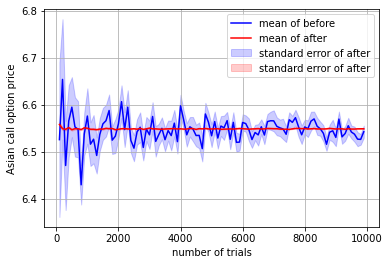

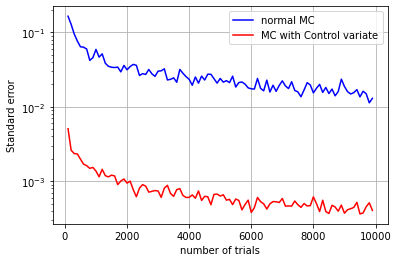

In [57]:
#change the number of path
beta1=1.035
repeat=30
trials=np.arange(100,10000,100)
points=50
S0=100
K=99
T=1
sigma=0.2
r=0.06
option_type="call"
geo_apath=geoanalytical_price(points,S0,r,sigma,T,K,option_type)

before_mean1=np.zeros(len(trials))
before_se1=np.zeros(len(trials))
after_mean1=np.zeros(len(trials))
after_se1=np.zeros(len(trials))

for i in range(len(trials)):
    before_mean1[i],before_se1[i],after_mean1[i],after_se1[i]=control_asianoption(repeat,trials[i],points,S0,r,sigma,T,K,beta1,geo_apath,"call")

print(before_se1)
print(after_se1)
plt.plot(trials,before_mean1,color='blue',label="mean of before")
plt.fill_between(trials,before_mean1-before_se1,before_mean1+before_se1,color='blue', alpha=0.2,label="standard error of after")
plt.plot(trials,after_mean1,color='red',label="mean of after")
plt.fill_between(trials,after_mean1-after_se1,after_mean1+after_se1,color='red', alpha=0.2,label="standard error of after")
plt.legend(loc="best")
plt.grid()
plt.xlabel("number of trials")
plt.ylabel("Asian call option price")
plt.savefig("part3_3pathprice", dpi=400)
plt.show()

plt.semilogy(trials,before_se1,color='blue',label="normal MC")
plt.semilogy(trials,after_se1,color='red',label="MC with Control variate")
plt.legend(loc="best")
plt.grid()
plt.xlabel("number of trials")
plt.ylabel("Standard error")
plt.savefig("part3_3pathse", dpi=400)
plt.show()

[0.05224534 0.0556123  0.06261862 0.05768205 0.05870635 0.04763592
 0.05995523 0.04870663 0.04074337 0.05179337 0.04689972 0.05023906
 0.04753092 0.03176705 0.03801443 0.03761506 0.03264326 0.03460651
 0.02953689]
[0.00123117 0.00174345 0.00153028 0.00156092 0.0015061  0.0011712
 0.00160101 0.00116547 0.00123636 0.00127236 0.00097194 0.00147511
 0.00128046 0.00127009 0.00119344 0.00128497 0.0012792  0.00169478
 0.0013402 ]


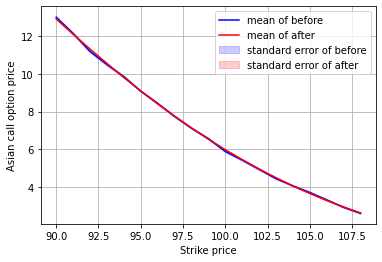

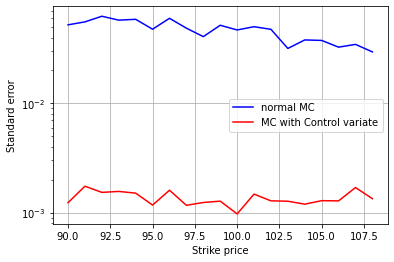

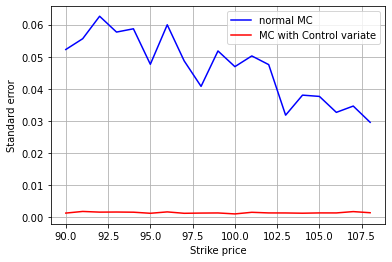

In [59]:
#change the strike price
beta1=1.035
repeat=30
trials=1000
points=50
S0=100
K=np.arange(90,109,1)
T=1
sigma=0.2
r=0.06
option_type="call"

before_mean2=np.zeros(len(K))
before_se2=np.zeros(len(K))
after_mean2=np.zeros(len(K))
after_se2=np.zeros(len(K))

for i in range(len(K)):
    geo_ak=geoanalytical_price(points,S0,r,sigma,T,K[i],option_type)
    before_mean2[i],before_se2[i],after_mean2[i],after_se2[i]=control_asianoption(repeat,trials,points,S0,r,sigma,T,K[i],beta1,geo_ak,"call")

print(before_se2)
print(after_se2)
plt.plot(K,before_mean2,color='blue',label="mean of before")
plt.fill_between(K,before_mean2-before_se2,before_mean2+before_se2,color='blue', alpha=0.2,label="standard error of before")
plt.plot(K,after_mean2,color='red',label="mean of after")
plt.fill_between(K,after_mean2-after_se2,after_mean2+after_se2,color='red', alpha=0.2,label="standard error of after")
plt.legend(loc="best")
plt.grid()
plt.xlabel("Strike price")
plt.ylabel("Asian call option price")
plt.savefig("part3_3strikeprice", dpi=400)
plt.show()

plt.semilogy(K,before_se2,color='blue',label="normal MC")
plt.semilogy(K,after_se2,color='red',label="MC with Control variate")
plt.legend(loc="best")
plt.grid()
plt.xlabel("Strike price")
plt.ylabel("Standard error")
plt.savefig("part3_3strikese", dpi=400)
plt.show()

plt.plot(K,before_se2,color='blue',label="normal MC")
plt.plot(K,after_se2,color='red',label="MC with Control variate")
plt.legend(loc="best")
plt.grid()
plt.xlabel("Strike price")
plt.ylabel("Standard error")
plt.savefig("part3_3strikese1", dpi=400)
plt.show()

[0.04947904 0.0472639  0.05094601 0.05029092 0.04856924 0.04123841
 0.04562754 0.03660285 0.03655854 0.05833338 0.04704871 0.03927994
 0.03915427 0.05499666 0.05012891 0.04192266 0.05496149 0.04253303]
[0.00166957 0.00161526 0.00119717 0.00140955 0.00143583 0.001303
 0.00119873 0.00155483 0.00135089 0.00140424 0.00130822 0.00148898
 0.00111156 0.00113314 0.00128094 0.0013421  0.00116463 0.00148097]


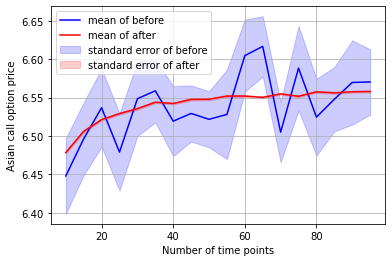

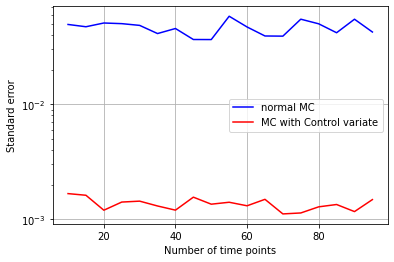

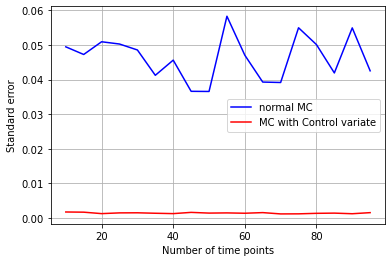

In [61]:
#change the number of time points
beta1=1.035
repeat=30
trials=1000
points=np.arange(10,100,5)
S0=100
K=99
T=1
sigma=0.2
r=0.06
option_type="call"

before_mean3=np.zeros(len(points))
before_se3=np.zeros(len(points))
after_mean3=np.zeros(len(points))
after_se3=np.zeros(len(points))

for i in range(len(points)):
    geo_ap=geoanalytical_price(points[i],S0,r,sigma,T,K,option_type)
    before_mean3[i],before_se3[i],after_mean3[i],after_se3[i]=control_asianoption(repeat,trials,points[i],S0,r,sigma,T,K,beta1,geo_ap,"call")

print(before_se3)
print(after_se3)
plt.plot(points,before_mean3,color='blue',label="mean of before")
plt.fill_between(points,before_mean3-before_se3,before_mean3+before_se3,color='blue', alpha=0.2,label="standard error of before")
plt.plot(points,after_mean3,color='red',label="mean of after")
plt.fill_between(points,after_mean3-after_se3,after_mean3+after_se3,color='red', alpha=0.2,label="standard error of after")
plt.legend(loc="best")
plt.grid()
plt.xlabel("Number of time points")
plt.ylabel("Asian call option price")
plt.savefig("part3_3pointprice", dpi=400)
plt.show()

plt.semilogy(points,before_se3,color='blue',label="normal MC")
plt.semilogy(points,after_se3,color='red',label="MC with Control variate")
plt.legend(loc="best")
plt.grid()
plt.xlabel("Number of time points")
plt.ylabel("Standard error")
plt.savefig("part3_3pointse", dpi=400)
plt.show()

plt.plot(points,before_se3,color='blue',label="normal MC")
plt.plot(points,after_se3,color='red',label="MC with Control variate")
plt.legend(loc="best")
plt.grid()
plt.xlabel("Number of time points")
plt.ylabel("Standard error")
plt.savefig("part3_3pointse1", dpi=400)
plt.show()

[0.01443479 0.02739823 0.04295065 0.04748325 0.06702377 0.06619768
 0.0784336 ]
[0.00043673 0.00058322 0.00093133 0.00120271 0.00226644 0.0043276
 0.0055206 ]


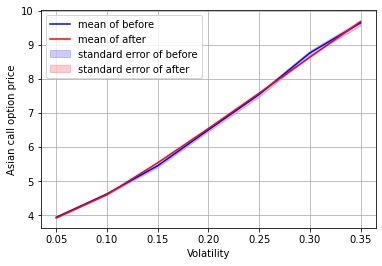

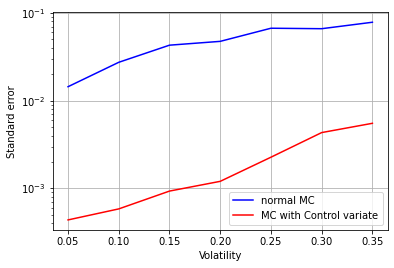

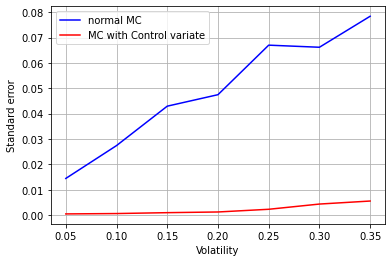

In [62]:
#change the volatility
beta1=1.035
repeat=30
trials=1000
points=50
S0=100
K=99
T=1
sigma=np.arange(0.05,0.4,0.05)
r=0.06
option_type="call"

before_mean4=np.zeros(len(sigma))
before_se4=np.zeros(len(sigma))
after_mean4=np.zeros(len(sigma))
after_se4=np.zeros(len(sigma))

for i in range(len(sigma)):
    geo_av=geoanalytical_price(points,S0,r,sigma[i],T,K,option_type)
    before_mean4[i],before_se4[i],after_mean4[i],after_se4[i]=control_asianoption(repeat,trials,points,S0,r,sigma[i],T,K,beta1,geo_av,"call")

print(before_se4)
print(after_se4)
plt.plot(sigma,before_mean4,color='blue',label="mean of before")
plt.fill_between(sigma,before_mean4-before_se4,before_mean4+before_se4,color='blue', alpha=0.2,label="standard error of before")
plt.plot(sigma,after_mean4,color='red',label="mean of after")
plt.fill_between(sigma,after_mean4-after_se4,after_mean4+after_se4,color='red', alpha=0.2,label="standard error of after")
plt.legend(loc="best")
plt.grid()
plt.xlabel("Volatility")
plt.ylabel("Asian call option price")
plt.savefig("part3_3volprice", dpi=400)
plt.show()

plt.semilogy(sigma,before_se4,color='blue',label="normal MC")
plt.semilogy(sigma,after_se4,color='red',label="MC with Control variate")
plt.legend(loc="best")
plt.grid()
plt.xlabel("Volatility")
plt.ylabel("Standard error")
plt.savefig("part3_3volse", dpi=400)
plt.show()

plt.plot(sigma,before_se4,color='blue',label="normal MC")
plt.plot(sigma,after_se4,color='red',label="MC with Control variate")
plt.legend(loc="best")
plt.grid()
plt.xlabel("Volatility")
plt.ylabel("Standard error")
plt.savefig("part3_3volse1", dpi=400)
plt.show()

[1.02296956 1.02227347 1.02445321 1.02620407 1.02822442 1.02878227
 1.03105411 1.03164201 1.03465519 1.03595284 1.03757679 1.03922618
 1.04053878 1.04447351 1.04663402 1.04867746 1.0513302  1.05421334
 1.05717122]


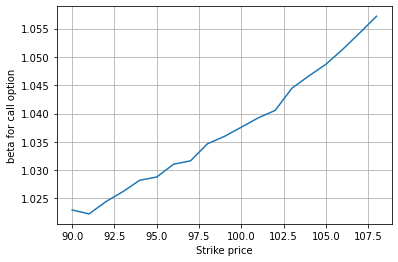

In [63]:
#check the reason why the variance increases
sample_size=1000
trials=1000
points=50
T=1
K=np.arange(90,109,1)
S0=100
r=0.06
sigma=0.2
option_type="call"

beta2=np.zeros(len(K))
for i in range(len(K)):
    beta2[i]=calbeta(sample_size,trials,points,S0,r,sigma,T,K[i],option_type)
    
print(beta2)
plt.plot(K, beta2)
plt.xlabel("Strike price")
plt.ylabel("beta for call option")
plt.grid()
plt.savefig("betaforK", dpi=400)
plt.show()

[1.01010186 1.01730726 1.02626512 1.03634457 1.04654161 1.05575905
 1.06775139]


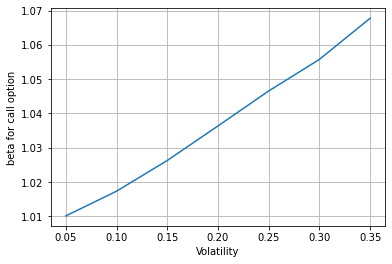

In [64]:
#check the reason why the variance increases
sample_size=1000
trials=1000
points=50
T=1
K=99
S0=100
r=0.06
sigma=np.arange(0.05,0.4,0.05)
option_type="call"

beta3=np.zeros(len(sigma))
for i in range(len(sigma)):
    beta3[i]=calbeta(sample_size,trials,points,S0,r,sigma[i],T,K,option_type)
    
print(beta3)
plt.plot(sigma, beta3)
plt.xlabel("Volatility")
plt.ylabel("beta for call option")
plt.grid()
plt.savefig("betaforvol", dpi=400)
plt.show()